In [1]:
import os
import cv2
import math
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.getcwd()

'/Users/lukemcevoy/Develop/MAE'

Mean 9.779296875 Max 255 Min 0


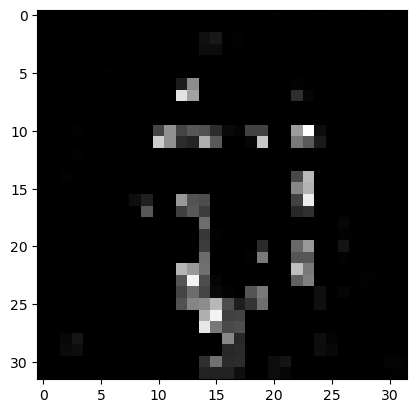

In [2]:
masked_images_dir = os.path.join(os.getcwd(), 'Jan-MAE-Windows/ALL-DATA/Masked-Images/')

fn = '0-75-32-0-plt.png'
masked_raw_img = os.path.join(masked_images_dir, fn)

img = cv2.imread(masked_raw_img, cv2.IMREAD_GRAYSCALE)

print("Mean", np.mean(img), "Max", np.max(img), "Min", np.min(img))

plt.imshow(img, cmap='gray')

          y      x  counts
0    -0.500 -0.350       1
1    -0.478 -0.350       6
2    -0.456 -0.350       5
3    -0.434 -0.350       2
4    -0.412 -0.350       3
...     ...    ...     ...
1019  0.091  0.328       4
1020  0.113  0.328       3
1021  0.134  0.328       1
1022  0.156  0.328       2
1023  0.178  0.328       5

[1024 rows x 3 columns]


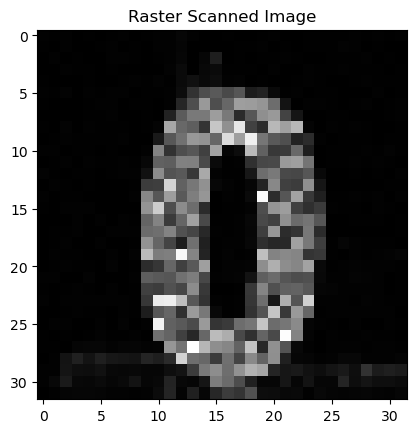

In [62]:
# path = '/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-75/0-32-75mask/0-32-75-ALL.csv'
path = '/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-75/0-32-75mask/0-32-75-ALL.csv'
mask_percentage = 75
size = 32
letter = '0'
df = pd.read_csv(path, header=0)

print(df)

def transform_df(df):
    conversion_x = {}
    for idx, value in enumerate(sorted(list(set(df['x'])))):
        conversion_x[value] = idx

    conversion_y = {}
    for idx, value in enumerate(sorted(list(set(df['y'])))):
        conversion_y[value] = idx
        
    df['x'] = df['x'].map(lambda x: conversion_x[x])
    df['y'] = df['y'].map(lambda y: conversion_y[y])
    df = df[['x', 'y', 'counts']]
    return df
    
def image_process(df):
    tmp_df = transform_df(df)
    z = np.array(tmp_df['counts'])
    shape = int(math.sqrt(int(df.shape[0])))
    z = np.reshape(z, (shape, shape))
    z = z.T
    z = np.flipud(z)
    
    plt.title('Raster Scanned Image')
    plt.imshow(z, cmap='gray')
    plt.show()
        
image_process(df)

In [86]:
256 * 0.25

64.0

In [32]:

mask_percentage = 75

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(string.ascii_uppercase):
    for idx in range(10):
        print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

        print('')
        print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-75/{letter}-32-75mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
        print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, idx)
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0] * 0.1

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


        print('END: total photon counts', total_photon_counts)
        print('Average photon counts in an image', (total_photon_counts/ 64), 'KHz')
#         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
        print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), 'KHz')
        print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
        print('Max photon counts', max_photon_count, 'KHz')
        print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32)) * 1000
        grand_counter += 1


A 0

START: total photon counts 0
There are 256 tiles
END: total photon counts 2519.499999999998
Average photon counts in an image 39.36718749999997 KHz
Average photon counts per pixel in an image 2.4604492187499982 KHz
Average photon counts per pixel in an image 2460.449218749998 Hz
Max photon counts 50.7 KHz
Min photon counts 0 KHZ

A 1

START: total photon counts 0
There are 256 tiles
END: total photon counts 1953.7000000000005
Average photon counts in an image 30.526562500000008 KHz
Average photon counts per pixel in an image 1.9079101562500005 KHz
Average photon counts per pixel in an image 1907.9101562500005 Hz
Max photon counts 54.900000000000006 KHz
Min photon counts 0 KHZ

A 2

START: total photon counts 0
There are 256 tiles
END: total photon counts 1693.6999999999994
Average photon counts in an image 26.46406249999999 KHz
Average photon counts per pixel in an image 1.6540039062499994 KHz
Average photon counts per pixel in an image 1654.0039062499993 Hz
Max photon counts 52.

END: total photon counts 1693.2000000000012
Average photon counts in an image 26.45625000000002 KHz
Average photon counts per pixel in an image 1.6535156250000012 KHz
Average photon counts per pixel in an image 1653.5156250000011 Hz
Max photon counts 69.4 KHz
Min photon counts 0 KHZ

C 5

START: total photon counts 0
There are 256 tiles
END: total photon counts 1808.0
Average photon counts in an image 28.25 KHz
Average photon counts per pixel in an image 1.765625 KHz
Average photon counts per pixel in an image 1765.625 Hz
Max photon counts 62.800000000000004 KHz
Min photon counts 0 KHZ

C 6

START: total photon counts 0
There are 256 tiles
END: total photon counts 2060.7000000000025
Average photon counts in an image 32.19843750000004 KHz
Average photon counts per pixel in an image 2.0124023437500025 KHz
Average photon counts per pixel in an image 2012.4023437500025 Hz
Max photon counts 70.8 KHz
Min photon counts 0 KHZ

C 7

START: total photon counts 0
There are 256 tiles
END: total ph

END: total photon counts 5349.599999999999
Average photon counts in an image 83.58749999999999 KHz
Average photon counts per pixel in an image 5.2242187499999995 KHz
Average photon counts per pixel in an image 5224.218749999999 Hz
Max photon counts 104.4 KHz
Min photon counts 0 KHZ

F 0

START: total photon counts 0
There are 256 tiles
END: total photon counts 5105.6
Average photon counts in an image 79.775 KHz
Average photon counts per pixel in an image 4.9859375 KHz
Average photon counts per pixel in an image 4985.9375 Hz
Max photon counts 129.6 KHz
Min photon counts 0 KHZ

F 1

START: total photon counts 0
There are 256 tiles
END: total photon counts 3496.600000000002
Average photon counts in an image 54.634375000000034 KHz
Average photon counts per pixel in an image 3.414648437500002 KHz
Average photon counts per pixel in an image 3414.6484375000023 Hz
Max photon counts 111.5 KHz
Min photon counts 0 KHZ

F 2

START: total photon counts 0
There are 256 tiles
END: total photon counts

END: total photon counts 5744.699999999999
Average photon counts in an image 89.76093749999998 KHz
Average photon counts per pixel in an image 5.610058593749999 KHz
Average photon counts per pixel in an image 5610.058593749999 Hz
Max photon counts 107.2 KHz
Min photon counts 0 KHZ

H 5

START: total photon counts 0
There are 256 tiles
END: total photon counts 6944.099999999999
Average photon counts in an image 108.50156249999999 KHz
Average photon counts per pixel in an image 6.7813476562499995 KHz
Average photon counts per pixel in an image 6781.347656249999 Hz
Max photon counts 102.5 KHz
Min photon counts 0 KHZ

H 6

START: total photon counts 0
There are 256 tiles
END: total photon counts 6131.999999999998
Average photon counts in an image 95.81249999999997 KHz
Average photon counts per pixel in an image 5.988281249999998 KHz
Average photon counts per pixel in an image 5988.281249999998 Hz
Max photon counts 115.7 KHz
Min photon counts 0 KHZ

H 7

START: total photon counts 0
There a

END: total photon counts 2808.799999999999
Average photon counts in an image 43.88749999999998 KHz
Average photon counts per pixel in an image 2.742968749999999 KHz
Average photon counts per pixel in an image 2742.9687499999986 Hz
Max photon counts 51.900000000000006 KHz
Min photon counts 0 KHZ

K 8

START: total photon counts 0
There are 256 tiles
END: total photon counts 2580.1999999999975
Average photon counts in an image 40.31562499999996 KHz
Average photon counts per pixel in an image 2.5197265624999976 KHz
Average photon counts per pixel in an image 2519.7265624999977 Hz
Max photon counts 57.400000000000006 KHz
Min photon counts 0 KHZ

K 9

START: total photon counts 0
There are 256 tiles
END: total photon counts 2366.000000000001
Average photon counts in an image 36.968750000000014 KHz
Average photon counts per pixel in an image 2.310546875000001 KHz
Average photon counts per pixel in an image 2310.546875000001 Hz
Max photon counts 58.400000000000006 KHz
Min photon counts 0 KHZ


END: total photon counts 1846.7999999999993
Average photon counts in an image 28.85624999999999 KHz
Average photon counts per pixel in an image 1.8035156249999993 KHz
Average photon counts per pixel in an image 1803.5156249999993 Hz
Max photon counts 35.7 KHz
Min photon counts 0 KHZ

N 3

START: total photon counts 0
There are 256 tiles
END: total photon counts 1524.7999999999995
Average photon counts in an image 23.824999999999992 KHz
Average photon counts per pixel in an image 1.4890624999999995 KHz
Average photon counts per pixel in an image 1489.0624999999995 Hz
Max photon counts 37.2 KHz
Min photon counts 0 KHZ

N 4

START: total photon counts 0
There are 256 tiles
END: total photon counts 1504.7999999999988
Average photon counts in an image 23.51249999999998 KHz
Average photon counts per pixel in an image 1.4695312499999988 KHz
Average photon counts per pixel in an image 1469.5312499999989 Hz
Max photon counts 40.800000000000004 KHz
Min photon counts 0 KHZ

N 5

START: total phot

END: total photon counts 2800.7999999999984
Average photon counts in an image 43.762499999999974 KHz
Average photon counts per pixel in an image 2.7351562499999984 KHz
Average photon counts per pixel in an image 2735.156249999998 Hz
Max photon counts 62.0 KHz
Min photon counts 0 KHZ

P 7

START: total photon counts 0
There are 256 tiles
END: total photon counts 1762.1000000000006
Average photon counts in an image 27.53281250000001 KHz
Average photon counts per pixel in an image 1.7208007812500006 KHz
Average photon counts per pixel in an image 1720.8007812500007 Hz
Max photon counts 63.900000000000006 KHz
Min photon counts 0 KHZ

P 8

START: total photon counts 0
There are 256 tiles
END: total photon counts 2268.0000000000005
Average photon counts in an image 35.43750000000001 KHz
Average photon counts per pixel in an image 2.2148437500000004 KHz
Average photon counts per pixel in an image 2214.8437500000005 Hz
Max photon counts 66.8 KHz
Min photon counts 0 KHZ

P 9

START: total photo

END: total photon counts 3139.6999999999966
Average photon counts in an image 49.05781249999995 KHz
Average photon counts per pixel in an image 3.0661132812499967 KHz
Average photon counts per pixel in an image 3066.113281249997 Hz
Max photon counts 80.80000000000001 KHz
Min photon counts 0 KHZ

S 2

START: total photon counts 0
There are 256 tiles
END: total photon counts 3068.3999999999987
Average photon counts in an image 47.94374999999998 KHz
Average photon counts per pixel in an image 2.9964843749999988 KHz
Average photon counts per pixel in an image 2996.4843749999986 Hz
Max photon counts 83.10000000000001 KHz
Min photon counts 0 KHZ

S 3

START: total photon counts 0
There are 256 tiles
END: total photon counts 2876.6999999999985
Average photon counts in an image 44.948437499999976 KHz
Average photon counts per pixel in an image 2.8092773437499985 KHz
Average photon counts per pixel in an image 2809.2773437499986 Hz
Max photon counts 86.5 KHz
Min photon counts 0 KHZ

S 4

START:

END: total photon counts 2153.1
Average photon counts in an image 33.6421875 KHz
Average photon counts per pixel in an image 2.10263671875 KHz
Average photon counts per pixel in an image 2102.63671875 Hz
Max photon counts 69.10000000000001 KHz
Min photon counts 0 KHZ

U 6

START: total photon counts 0
There are 256 tiles
END: total photon counts 2565.2000000000003
Average photon counts in an image 40.081250000000004 KHz
Average photon counts per pixel in an image 2.5050781250000003 KHz
Average photon counts per pixel in an image 2505.0781250000005 Hz
Max photon counts 88.7 KHz
Min photon counts 0 KHZ

U 7

START: total photon counts 0
There are 256 tiles
END: total photon counts 2252.199999999999
Average photon counts in an image 35.19062499999998 KHz
Average photon counts per pixel in an image 2.199414062499999 KHz
Average photon counts per pixel in an image 2199.414062499999 Hz
Max photon counts 77.80000000000001 KHz
Min photon counts 0 KHZ

U 8

START: total photon counts 0
There ar

END: total photon counts 3390.3000000000006
Average photon counts in an image 52.97343750000001 KHz
Average photon counts per pixel in an image 3.3108398437500006 KHz
Average photon counts per pixel in an image 3310.8398437500005 Hz
Max photon counts 130.6 KHz
Min photon counts 0 KHZ

X 1

START: total photon counts 0
There are 256 tiles
END: total photon counts 2811.7999999999993
Average photon counts in an image 43.93437499999999 KHz
Average photon counts per pixel in an image 2.7458984374999993 KHz
Average photon counts per pixel in an image 2745.898437499999 Hz
Max photon counts 115.9 KHz
Min photon counts 0 KHZ

X 2

START: total photon counts 0
There are 256 tiles
END: total photon counts 2192.1999999999994
Average photon counts in an image 34.25312499999999 KHz
Average photon counts per pixel in an image 2.1408203124999994 KHz
Average photon counts per pixel in an image 2140.8203124999995 Hz
Max photon counts 84.4 KHz
Min photon counts 0 KHZ

X 3

START: total photon counts 0
Th

END: total photon counts 3455.7999999999965
Average photon counts in an image 53.996874999999946 KHz
Average photon counts per pixel in an image 3.3748046874999966 KHz
Average photon counts per pixel in an image 3374.804687499997 Hz
Max photon counts 85.80000000000001 KHz
Min photon counts 0 KHZ

Z 5

START: total photon counts 0
There are 256 tiles
END: total photon counts 4347.299999999998
Average photon counts in an image 67.92656249999997 KHz
Average photon counts per pixel in an image 4.245410156249998 KHz
Average photon counts per pixel in an image 4245.410156249998 Hz
Max photon counts 107.0 KHz
Min photon counts 0 KHZ

Z 6

START: total photon counts 0
There are 256 tiles
END: total photon counts 5465.600000000001
Average photon counts in an image 85.40000000000002 KHz
Average photon counts per pixel in an image 5.337500000000001 KHz
Average photon counts per pixel in an image 5337.500000000001 Hz
Max photon counts 124.80000000000001 KHz
Min photon counts 0 KHZ

Z 7

START: tot

In [34]:
print('Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'Hz')

Grand Average Photon Counter per pixel per image 3897.6397778614455 Hz


In [76]:

mask_percentage = 75

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(string.ascii_uppercase):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-75/{letter}-32-75mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, df['counts'][0])
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0]
#             photon_counts = df['counts'][0] * 100

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
##         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), 'KHz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32))
        grand_counter += 1
        
print('75 0.01 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'photons')

A 0
A 1
A 2
A 3
A 4
A 5
A 6
A 7
A 8
A 9
A 10
A 11
A 12
A 13
A 14
A 15
A 16
A 17
A 18
A 19
A 20
A 21
A 22
A 23
A 24
A 25
A 26
A 27
A 28
A 29
A 30
A 31
A 32
A 33
A 34
A 35
A 36
A 37
A 38
A 39
A 40
A 41
A 42
A 43
A 44
A 45
A 46
A 47
A 48
A 49
B 0
B 1
B 2
B 3
B 4
B 5
B 6
B 7
B 8
B 9
B 10
B 11
B 12
B 13
B 14
B 15
B 16
B 17
B 18
B 19
B 20
B 21
B 22
B 23
B 24
B 25
B 26
B 27
B 28
B 29
B 30
B 31
B 32
B 33
B 34
B 35
B 36
B 37
B 38
B 39
B 40
B 41
B 42
B 43
B 44
B 45
B 46
B 47
B 48
B 49
C 0
C 1
C 2
C 3
C 4
C 5
C 6
C 7
C 8
C 9
C 10
C 11
C 12
C 13
C 14
C 15
C 16
C 17
C 18
C 19
C 20
C 21
C 22
C 23
C 24
C 25
C 26
C 27
C 28
C 29
C 30
C 31
C 32
C 33
C 34
C 35
C 36
C 37
C 38
C 39
C 40
C 41
C 42
C 43
C 44
C 45
C 46
C 47
C 48
C 49
D 0
D 1
D 2
D 3
D 4
D 5
D 6
D 7
D 8
D 9
D 10
D 11
D 12
D 13
D 14
D 15
D 16
D 17
D 18
D 19
D 20
D 21
D 22
D 23
D 24
D 25
D 26
D 27
D 28
D 29
D 30
D 31
D 32
here /Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-75/D-32-75mask/32/27-27-1-75-32.csv
D 33
D 34
D 35
D 36
D 37
D 38


In [77]:

mask_percentage = 75

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(range(10)):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-75/{letter}-32-75mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, df['counts'][0])
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0]
#             photon_counts = df['counts'][0] * 100

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
##         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), 'KHz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32))
        grand_counter += 1
        
print('75 0.01 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'photons')

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9


In [78]:

mask_percentage = 90

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(string.ascii_uppercase):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-90/{letter}-32-90mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, df['counts'][0])
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0]
#             photon_counts = df['counts'][0] * 100

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
##         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), 'KHz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32))
        grand_counter += 1
        
print('90 0.01 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'photons')

A 0
A 1
A 2
A 3
A 4
A 5
A 6
A 7
A 8
A 9
A 10
A 11
A 12
A 13
A 14
A 15
A 16
A 17
A 18
A 19
A 20
A 21
A 22
A 23
A 24
A 25
A 26
A 27
A 28
A 29
A 30
A 31
A 32
A 33
A 34
A 35
A 36
A 37
A 38
A 39
A 40
A 41
A 42
A 43
A 44
A 45
A 46
A 47
A 48
A 49
B 0
B 1
B 2
B 3
B 4
B 5
B 6
B 7
B 8
B 9
B 10
B 11
B 12
B 13
B 14
B 15
B 16
B 17
B 18
B 19
B 20
B 21
B 22
B 23
B 24
B 25
B 26
B 27
B 28
B 29
B 30
B 31
B 32
B 33
B 34
B 35
B 36
B 37
B 38
B 39
B 40
B 41
B 42
B 43
B 44
B 45
B 46
B 47
B 48
B 49
C 0
C 1
C 2
C 3
C 4
C 5
C 6
C 7
C 8
C 9
C 10
C 11
C 12
C 13
C 14
C 15
C 16
C 17
C 18
C 19
C 20
C 21
C 22
C 23
C 24
C 25
C 26
C 27
C 28
C 29
C 30
C 31
C 32
C 33
C 34
C 35
C 36
C 37
C 38
C 39
C 40
C 41
C 42
C 43
C 44
C 45
C 46
C 47
here /Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-90/C-32-90mask/47/9-1-1-90-47.csv
C 48
C 49
D 0
D 1
D 2
D 3
D 4
D 5
D 6
D 7
D 8
D 9
D 10
D 11
D 12
D 13
D 14
D 15
D 16
D 17
D 18
D 19
D 20
D 21
D 22
D 23
D 24
D 25
D 26
D 27
D 28
D 29
D 30
D 31
D 32
D 33
D 34
here /Users/lukemcevoy

In [79]:

mask_percentage = 90

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(range(10)):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-90/{letter}-32-90mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, df['counts'][0])
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0]
#             photon_counts = df['counts'][0] * 100

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
##         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), 'KHz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32))
        grand_counter += 1
        
print('75 0.01 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'photons')

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
here /Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-90/2-32-90mask/26/3-9-1-90-26.csv
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 

TDC = 10,000

<h1>75% Mask LETTERS Detection Per Pulse</h1>

In [59]:

mask_percentage = 75

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(string.ascii_uppercase):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-75/{letter}-32-75mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, df['counts'][0])
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0] * 0.01
#             photon_counts = df['counts'][0] * 100

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
##         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), 'KHz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32)) * 1000
        grand_counter += 1
        
print('75 0.01 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'Hz')

A 0
A 1
A 2
A 3
A 4
A 5
A 6
A 7
A 8
A 9
A 10
A 11
A 12
A 13
A 14
A 15
A 16
A 17
A 18
A 19
A 20
A 21
A 22
A 23
A 24
A 25
A 26
A 27
A 28
A 29
A 30
A 31
A 32
A 33
A 34
A 35
A 36
A 37
A 38
A 39
A 40
A 41
A 42
A 43
A 44
A 45
A 46
A 47
A 48
A 49
B 0
B 1
B 2
B 3
B 4
B 5
B 6
B 7
B 8
B 9
B 10
B 11
B 12
B 13
B 14
B 15
B 16
B 17
B 18
B 19
B 20
B 21
B 22
B 23
B 24
B 25
B 26
B 27
B 28
B 29
B 30
B 31
B 32
B 33
B 34
B 35
B 36
B 37
B 38
B 39
B 40
B 41
B 42
B 43
B 44
B 45
B 46
B 47
B 48
B 49
C 0
C 1
C 2
C 3
C 4
C 5
C 6
C 7
C 8
C 9
C 10
C 11
C 12
C 13
C 14
C 15
C 16
C 17
C 18
C 19
C 20
C 21
C 22
C 23
C 24
C 25
C 26
C 27
C 28
C 29
C 30
C 31
C 32
C 33
C 34
C 35
C 36
C 37
C 38
C 39
C 40
C 41
C 42
C 43
C 44
C 45
C 46
C 47
C 48
C 49
D 0
D 1
D 2
D 3
D 4
D 5
D 6
D 7
D 8
D 9
D 10
D 11
D 12
D 13
D 14
D 15
D 16
D 17
D 18
D 19
D 20
D 21
D 22
D 23
D 24
D 25
D 26
D 27
D 28
D 29
D 30
D 31
D 32
here /Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-75/D-32-75mask/32/27-27-1-75-32.csv
D 33
D 34
D 35
D 36
D 37
D 38


<h1>75% Mask NUMBERS Detection Per Pulse</h1>

In [60]:

mask_percentage = 75

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(range(10)):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-75/{letter}-32-75mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, df['counts'][0])
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0] * 0.01
#             photon_counts = df['counts'][0] * 100

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
##         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), 'KHz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32)) * 1000
        grand_counter += 1
        
print('75 0.01 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'Hz')

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9


<h1>90% Mask LETTERS Detection Per Pulse</h1>

In [64]:

mask_percentage = 90

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(string.ascii_uppercase):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-90/{letter}-32-90mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, df['counts'][0])
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0] * 0.01
#             photon_counts = df['counts'][0] * 100

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
##         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), 'KHz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32)) * 1000
        grand_counter += 1
        
print('75 0.01 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'Hz')

A 0
A 1
A 2
A 3
A 4
A 5
A 6
A 7
A 8
A 9
A 10
A 11
A 12
A 13
A 14
A 15
A 16
A 17
A 18
A 19
A 20
A 21
A 22
A 23
A 24
A 25
A 26
A 27
A 28
A 29
A 30
A 31
A 32
A 33
A 34
A 35
A 36
A 37
A 38
A 39
A 40
A 41
A 42
A 43
A 44
A 45
A 46
A 47
A 48
A 49
B 0
B 1
B 2
B 3
B 4
B 5
B 6
B 7
B 8
B 9
B 10
B 11
B 12
B 13
B 14
B 15
B 16
B 17
B 18
B 19
B 20
B 21
B 22
B 23
B 24
B 25
B 26
B 27
B 28
B 29
B 30
B 31
B 32
B 33
B 34
B 35
B 36
B 37
B 38
B 39
B 40
B 41
B 42
B 43
B 44
B 45
B 46
B 47
B 48
B 49
C 0
C 1
C 2
C 3
C 4
C 5
C 6
C 7
C 8
C 9
C 10
C 11
C 12
C 13
C 14
C 15
C 16
C 17
C 18
C 19
C 20
C 21
C 22
C 23
C 24
C 25
C 26
C 27
C 28
C 29
C 30
C 31
C 32
C 33
C 34
C 35
C 36
C 37
C 38
C 39
C 40
C 41
C 42
C 43
C 44
C 45
C 46
C 47
here /Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-90/C-32-90mask/47/9-1-1-90-47.csv
C 48
C 49
D 0
D 1
D 2
D 3
D 4
D 5
D 6
D 7
D 8
D 9
D 10
D 11
D 12
D 13
D 14
D 15
D 16
D 17
D 18
D 19
D 20
D 21
D 22
D 23
D 24
D 25
D 26
D 27
D 28
D 29
D 30
D 31
D 32
D 33
D 34
here /Users/lukemcevoy

<h1>90% Mask NUMBERS Detection Per Pulse</h1>

In [72]:

mask_percentage = 90

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(range(10)):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-90/{letter}-32-90mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, df['counts'][0])
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0] * 0.01
#             photon_counts = df['counts'][0] * 100

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
##         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), 'KHz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32)) * 1000
        grand_counter += 1
        
print('75 0.01 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'Hz')

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
here /Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-90/2-32-90mask/26/3-9-1-90-26.csv
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 

In [56]:

mask_percentage = 90

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(string.ascii_uppercase):
    for idx in range(50):
        print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

        print('')
        print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-90/{letter}-32-90mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
        print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, idx)
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0] 

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


        print('END: total photon counts', total_photon_counts)
        print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
#         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
        print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), )
        print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
        print('Max photon counts', max_photon_count, 'KHz')
        print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32)) * 1000
        grand_counter += 1
        
print('90 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'Hz')


A 0

START: total photon counts 0
There are 100 tiles
END: total photon counts 7667
Average photon counts in an image 29.94921875 KHz
Average photon counts per pixel in an image 7.4873046875
Average photon counts per pixel in an image 7487.3046875 Hz
Max photon counts 900 KHz
Min photon counts 0 KHZ

A 1

START: total photon counts 0
There are 100 tiles
END: total photon counts 9158
Average photon counts in an image 35.7734375 KHz
Average photon counts per pixel in an image 8.943359375
Average photon counts per pixel in an image 8943.359375 Hz
Max photon counts 807 KHz
Min photon counts 0 KHZ

A 2

START: total photon counts 0
There are 100 tiles
END: total photon counts 16143
Average photon counts in an image 63.05859375 KHz
Average photon counts per pixel in an image 15.7646484375
Average photon counts per pixel in an image 15764.6484375 Hz
Max photon counts 816 KHz
Min photon counts 0 KHZ

A 3

START: total photon counts 0
There are 100 tiles
END: total photon counts 11574
Average 

END: total photon counts 12821
Average photon counts in an image 50.08203125 KHz
Average photon counts per pixel in an image 12.5205078125
Average photon counts per pixel in an image 12520.5078125 Hz
Max photon counts 718 KHz
Min photon counts 0 KHZ

C 8

START: total photon counts 0
There are 100 tiles
END: total photon counts 8190
Average photon counts in an image 31.9921875 KHz
Average photon counts per pixel in an image 7.998046875
Average photon counts per pixel in an image 7998.046875 Hz
Max photon counts 583 KHz
Min photon counts 0 KHZ

C 9

START: total photon counts 0
There are 100 tiles
END: total photon counts 3881
Average photon counts in an image 15.16015625 KHz
Average photon counts per pixel in an image 3.7900390625
Average photon counts per pixel in an image 3790.0390625 Hz
Max photon counts 547 KHz
Min photon counts 0 KHZ

D 0

START: total photon counts 0
There are 100 tiles
END: total photon counts 39700
Average photon counts in an image 155.078125 KHz
Average photon

END: total photon counts 13161
Average photon counts in an image 51.41015625 KHz
Average photon counts per pixel in an image 12.8525390625
Average photon counts per pixel in an image 12852.5390625 Hz
Max photon counts 1526 KHz
Min photon counts 0 KHZ

F 6

START: total photon counts 0
There are 100 tiles
END: total photon counts 26101
Average photon counts in an image 101.95703125 KHz
Average photon counts per pixel in an image 25.4892578125
Average photon counts per pixel in an image 25489.2578125 Hz
Max photon counts 1371 KHz
Min photon counts 0 KHZ

F 7

START: total photon counts 0
There are 100 tiles
END: total photon counts 20198
Average photon counts in an image 78.8984375 KHz
Average photon counts per pixel in an image 19.724609375
Average photon counts per pixel in an image 19724.609375 Hz
Max photon counts 1745 KHz
Min photon counts 0 KHZ

F 8

START: total photon counts 0
There are 100 tiles
END: total photon counts 19883
Average photon counts in an image 77.66796875 KHz
Ave

END: total photon counts 12943
Average photon counts in an image 50.55859375 KHz
Average photon counts per pixel in an image 12.6396484375
Average photon counts per pixel in an image 12639.6484375 Hz
Max photon counts 927 KHz
Min photon counts 0 KHZ

I 4

START: total photon counts 0
There are 100 tiles
END: total photon counts 9566
Average photon counts in an image 37.3671875 KHz
Average photon counts per pixel in an image 9.341796875
Average photon counts per pixel in an image 9341.796875 Hz
Max photon counts 1012 KHz
Min photon counts 0 KHZ

I 5

START: total photon counts 0
There are 100 tiles
END: total photon counts 13957
Average photon counts in an image 54.51953125 KHz
Average photon counts per pixel in an image 13.6298828125
Average photon counts per pixel in an image 13629.8828125 Hz
Max photon counts 934 KHz
Min photon counts 0 KHZ

I 6

START: total photon counts 0
There are 100 tiles
END: total photon counts 9976
Average photon counts in an image 38.96875 KHz
Average photo

END: total photon counts 30338
Average photon counts in an image 118.5078125 KHz
Average photon counts per pixel in an image 29.626953125
Average photon counts per pixel in an image 29626.953125 Hz
Max photon counts 1531 KHz
Min photon counts 0 KHZ

M 2

START: total photon counts 0
There are 100 tiles
END: total photon counts 23450
Average photon counts in an image 91.6015625 KHz
Average photon counts per pixel in an image 22.900390625
Average photon counts per pixel in an image 22900.390625 Hz
Max photon counts 1286 KHz
Min photon counts 0 KHZ

M 3

START: total photon counts 0
There are 100 tiles
END: total photon counts 23766
Average photon counts in an image 92.8359375 KHz
Average photon counts per pixel in an image 23.208984375
Average photon counts per pixel in an image 23208.984375 Hz
Max photon counts 1315 KHz
Min photon counts 0 KHZ

M 4

START: total photon counts 0
There are 100 tiles
END: total photon counts 37493
Average photon counts in an image 146.45703125 KHz
Average 

END: total photon counts 41120
Average photon counts in an image 160.625 KHz
Average photon counts per pixel in an image 40.15625
Average photon counts per pixel in an image 40156.25 Hz
Max photon counts 1637 KHz
Min photon counts 0 KHZ

P 0

START: total photon counts 0
There are 100 tiles
END: total photon counts 7518
Average photon counts in an image 29.3671875 KHz
Average photon counts per pixel in an image 7.341796875
Average photon counts per pixel in an image 7341.796875 Hz
Max photon counts 466 KHz
Min photon counts 0 KHZ

P 1

START: total photon counts 0
There are 100 tiles
END: total photon counts 8663
Average photon counts in an image 33.83984375 KHz
Average photon counts per pixel in an image 8.4599609375
Average photon counts per pixel in an image 8459.9609375 Hz
Max photon counts 440 KHz
Min photon counts 0 KHZ

P 2

START: total photon counts 0
There are 100 tiles
END: total photon counts 10641
Average photon counts in an image 41.56640625 KHz
Average photon counts per 

END: total photon counts 27849
Average photon counts in an image 108.78515625 KHz
Average photon counts per pixel in an image 27.1962890625
Average photon counts per pixel in an image 27196.2890625 Hz
Max photon counts 2165 KHz
Min photon counts 0 KHZ

R 8

START: total photon counts 0
There are 100 tiles
END: total photon counts 22370
Average photon counts in an image 87.3828125 KHz
Average photon counts per pixel in an image 21.845703125
Average photon counts per pixel in an image 21845.703125 Hz
Max photon counts 1813 KHz
Min photon counts 0 KHZ

R 9

START: total photon counts 0
There are 100 tiles
END: total photon counts 10703
Average photon counts in an image 41.80859375 KHz
Average photon counts per pixel in an image 10.4521484375
Average photon counts per pixel in an image 10452.1484375 Hz
Max photon counts 1529 KHz
Min photon counts 0 KHZ

S 0

START: total photon counts 0
There are 100 tiles
END: total photon counts 29547
Average photon counts in an image 115.41796875 KHz
Av

END: total photon counts 12708
Average photon counts in an image 49.640625 KHz
Average photon counts per pixel in an image 12.41015625
Average photon counts per pixel in an image 12410.15625 Hz
Max photon counts 1057 KHz
Min photon counts 0 KHZ

U 6

START: total photon counts 0
There are 100 tiles
END: total photon counts 16043
Average photon counts in an image 62.66796875 KHz
Average photon counts per pixel in an image 15.6669921875
Average photon counts per pixel in an image 15666.9921875 Hz
Max photon counts 779 KHz
Min photon counts 0 KHZ

U 7

START: total photon counts 0
There are 100 tiles
END: total photon counts 10181
Average photon counts in an image 39.76953125 KHz
Average photon counts per pixel in an image 9.9423828125
Average photon counts per pixel in an image 9942.3828125 Hz
Max photon counts 765 KHz
Min photon counts 0 KHZ

U 8

START: total photon counts 0
There are 100 tiles
END: total photon counts 7491
Average photon counts in an image 29.26171875 KHz
Average phot

END: total photon counts 8564
Average photon counts in an image 33.453125 KHz
Average photon counts per pixel in an image 8.36328125
Average photon counts per pixel in an image 8363.28125 Hz
Max photon counts 568 KHz
Min photon counts 0 KHZ

X 4

START: total photon counts 0
There are 100 tiles
END: total photon counts 8158
Average photon counts in an image 31.8671875 KHz
Average photon counts per pixel in an image 7.966796875
Average photon counts per pixel in an image 7966.796875 Hz
Max photon counts 533 KHz
Min photon counts 0 KHZ

X 5

START: total photon counts 0
There are 100 tiles
END: total photon counts 10141
Average photon counts in an image 39.61328125 KHz
Average photon counts per pixel in an image 9.9033203125
Average photon counts per pixel in an image 9903.3203125 Hz
Max photon counts 569 KHz
Min photon counts 0 KHZ

X 6

START: total photon counts 0
There are 100 tiles
END: total photon counts 10080
Average photon counts in an image 39.375 KHz
Average photon counts per 

In [62]:

mask_percentage = 90

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(string.ascii_uppercase):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-90/{letter}-32-90mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, idx)
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0]

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
# #         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), )
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32)) * 1000
        grand_counter += 1
        
print('90 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'Hz')

A 0
A 1
A 2
A 3
A 4
A 5
A 6
A 7
A 8
A 9
A 10
A 11
A 12
A 13
A 14
A 15
A 16
A 17
A 18
A 19
A 20
A 21
A 22
A 23
A 24
A 25
A 26
A 27
A 28
A 29
A 30
A 31
A 32
A 33
A 34
A 35
A 36
A 37
A 38
A 39
A 40
A 41
A 42
A 43
A 44
A 45
A 46
A 47
A 48
A 49
B 0
B 1
B 2
B 3
B 4
B 5
B 6
B 7
B 8
B 9
B 10
B 11
B 12
B 13
B 14
B 15
B 16
B 17
B 18
B 19
B 20
B 21
B 22
B 23
B 24
B 25
B 26
B 27
B 28
B 29
B 30
B 31
B 32
B 33
B 34
B 35
B 36
B 37
B 38
B 39
B 40
B 41
B 42
B 43
B 44
B 45
B 46
B 47
B 48
B 49
C 0
C 1
C 2
C 3
C 4
C 5
C 6
C 7
C 8
C 9
C 10
C 11
C 12
C 13
C 14
C 15
C 16
C 17
C 18
C 19
C 20
C 21
C 22
C 23
C 24
C 25
C 26
C 27
C 28
C 29
C 30
C 31
C 32
C 33
C 34
C 35
C 36
C 37
C 38
C 39
C 40
C 41
C 42
C 43
C 44
C 45
C 46
C 47
here /Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/LETTERS-90/C-32-90mask/47/9-1-1-90-47.csv
C 48
C 49
D 0
D 1
D 2
D 3
D 4
D 5
D 6
D 7
D 8
D 9
D 10
D 11
D 12
D 13
D 14
D 15
D 16
D 17
D 18
D 19
D 20
D 21
D 22
D 23
D 24
D 25
D 26
D 27
D 28
D 29
D 30
D 31
D 32
D 33
D 34
here /Users/lukemcevoy

In [63]:

mask_percentage = 90

grand_photon_count_average_hertz = 0
grand_counter = 0

for letter in list(range(10)):
    for idx in range(50):
#         print('')
        print(letter, idx)

        total_photon_counts = 0
        
        max_photon_count, min_photon_count = 0, 0

#         print('')
#         print('START: total photon counts', total_photon_counts)

        mask = np.ones(shape=(32, 32))
        image = np.zeros(shape=(32, 32))

        window_scans_dir = f'/Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-90/{letter}-32-90mask/{idx}/'
        
        if not os.path.isdir(window_scans_dir):
            continue
            
#         print('There are', len(os.listdir(window_scans_dir)), 'tiles')
        for file in os.listdir(window_scans_dir):

            if os.path.isdir(os.path.join(os.getcwd(), window_scans_dir, file)):
                continue

            if '.DS_Store' in file:
                continue

            x = int(file.split('/')[-1].split('-')[0])
            y = int(file.split('/')[-1].split('-')[1])
#             print(x, y, idx)
            file_name = file
            file = os.path.join(os.getcwd(), window_scans_dir, file)
            df = pd.read_csv(file, header=0)

            if df.shape != (1, 3):
                print('here', file)
                continue
                
            photon_counts = df['counts'][0]

            image[x, y] = df['counts']
            total_photon_counts += photon_counts
#             print(df['counts'][0]*0.1, 'KHz')
    
            if photon_counts > max_photon_count:
                max_photon_count = photon_counts
                
            if photon_counts < min_photon_count:
                min_photon_count = photon_counts


#         print('END: total photon counts', total_photon_counts)
#         print('Average photon counts in an image', (total_photon_counts/ 256), 'KHz')
# #         print('Average photon counts in an image', (total_photon_counts) * 1000, 'Hz')
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)), )
#         print('Average photon counts per pixel in an image', (total_photon_counts / (32*32)) * 1000, 'Hz')
#         print('Max photon counts', max_photon_count, 'KHz')
#         print('Min photon counts', min_photon_count, 'KHZ')
        
        grand_photon_count_average_hertz += (total_photon_counts / (32*32)) * 1000
        grand_counter += 1
        
print('90 mask Grand Average Photon Counter per pixel per image', grand_photon_count_average_hertz / grand_counter, 'Hz')

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
here /Users/lukemcevoy/Develop/MAE/Jan-MAE-Windows/NUMBERS-90/2-32-90mask/26/3-9-1-90-26.csv
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 

In [6]:
masked_images = 'Jan-MAE-Windows/ALL-DATA/Masked-Images/'
masked_images_path = os.path.join(os.getcwd(), masked_images)

In [22]:
for masked_images in os.listdir(masked_images_path):
    if 'plt.png' in masked_images:
        masked_image = os.path.join(masked_images_path, masked_images)
        img = cv2.imread(masked_image, cv2.IMREAD_GRAYSCALE)
        print('')
        print('Mean', round(np.mean(img* 0.01), 4), 'KHz')
        print('Max', round(np.max(img* 0.01), 4), 'KHz')
        print('Min', round(np.min(img* 0.01), 4), 'KHz')


Mean 0.0772 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0493 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0342 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0213 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0533 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.033 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.1185 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.1 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0278 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.051 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.093 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0345 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0333 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.036 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0325 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0334 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0262 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.1449 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0353 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0534 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.043 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0515 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0138 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0187 KHz
Max 2.55 KHz
Min 0.0 KHz



Mean 0.1056 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0171 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.1249 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.044 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0694 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0705 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0094 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0277 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0361 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0733 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0304 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0721 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.1543 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0567 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0724 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0267 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0479 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0565 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0906 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0748 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0908 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0226 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0582 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0186 KHz
Max 2.55 KHz
Min 0


Mean 0.1264 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.1019 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0436 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.1687 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0859 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0529 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0957 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0932 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0154 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0967 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0248 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.126 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.069 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0143 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0362 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0425 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0867 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0258 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0336 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0905 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0957 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.1015 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0914 KHz
Max 2.55 KHz
Min 0.0 KHz

Mean 0.0916 KHz
Max 2.55 KHz
Min 0.